In [1]:
import pandas as pd
import ncaa_helper as nh
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed
from IPython.display import Image

# Data Delirium

## Overview

'Tis the season to get lost in madness, **March Madness**, that is. Madness is in the air and everyone is frantically trying to find the cutting edge tools to try and get an edge on their friend's brackets. I know I am.

Instead of spending time and money trying to find a tool to do this for me I spent a lot of time making one myself!

## The Data

The data I decided to use for this project is from the March Madness Bracket Prediction Competition on [Kaggle](https://www.kaggle.com). The data itself was very easy to manage and was compiled into separate CSV files.

### Data Organization
The data for NCAA Division 1 basketball is set up simply so that someone such as myself can analyze important aspects of the data without being bogged down by computational overhead in cleaning and organization.

The data I used is made up of four Comma-Separated files:
- **2016DetailedSeasonResults.csv** contains the data associated with each D1 game played in the 2016 season.
- **RegularSeasonDetailedResults.csv** contains the data associated with each D1 game played in the seasons from 2003-2015.
- **TourneyDetailedResults.csv** contains the data associated with each tournament game played in seasons 2003-2015.
- **Teams.csv** contains the Team_Id of each team as well as the Team_Name

The detailed results files contain game-by-game data with columns associated with measurements of the game (winning/losing score, winning/losing team, number of overtimes, winning/losing field goal attempts, etc.). The **Teams** file contains the team name and its id for lookup when appropriate.

I decided to use this data mostly because some very nice human being decided to spend their time scraping the web and compiling a database of team data and game data for every NCAA Division 1 season since 2003 so I didn't have to.

In [2]:
season_data_2016 = pd.read_pickle("new_season_detailed_results")
past_season_data = pd.read_pickle("past_season_detailed_results")
teams = pd.read_pickle("teams")

In [3]:
season_data_2016.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
65872,2016,11,1104,77,1244,64,H,0,29,57,...,19,19,26,12,27,6,16,7,4,25
65873,2016,11,1105,68,1408,67,A,1,25,64,...,27,16,26,18,30,11,19,6,7,21
65874,2016,11,1112,79,1334,61,H,0,24,61,...,19,13,19,5,23,9,9,3,1,25
65875,2016,11,1115,58,1370,56,A,0,20,55,...,16,16,28,10,31,12,15,5,0,17
65876,2016,11,1116,86,1380,68,H,0,32,66,...,12,20,28,7,21,9,17,8,5,22


In [4]:
teams.head()

,Team_Name
Team_Id,
1101,Abilene Chr
1102,Air Force
1103,Akron
1104,Alabama
1105,Alabama A&M


## Analysis of The Data For Teams

I wanted to see how certain variables correlated to other variables. Throughout this project it was difficult for me to decide which features to keep and which to get rid of.

This analysis tool was useful in showing me how columns correlated with one another:

In [5]:
def plot_year_data2(year, x_column, y_column):
    year_data = nh.beautify_columns(nh.calc_year_data(year, past_season_data, teams))
    sns.jointplot(x=x_column, y=y_column, data=year_data);

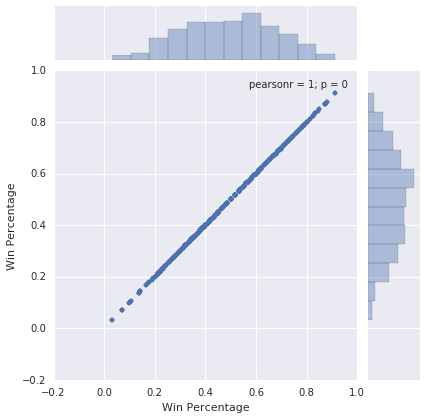

In [6]:
interact(plot_year_data2, year=(2003, 2015), x_column=nh.beautiful_columns, y_column=nh.beautiful_columns);

### The Homefield Advantage
A very interesting metric that I measured was the percentage of time that the winning team for a given game was the "home" team.

Winning team location was split into three categories - Home, Away, Neutral. Here are the calculated percentages that the winning team was one of these categories in a given game.

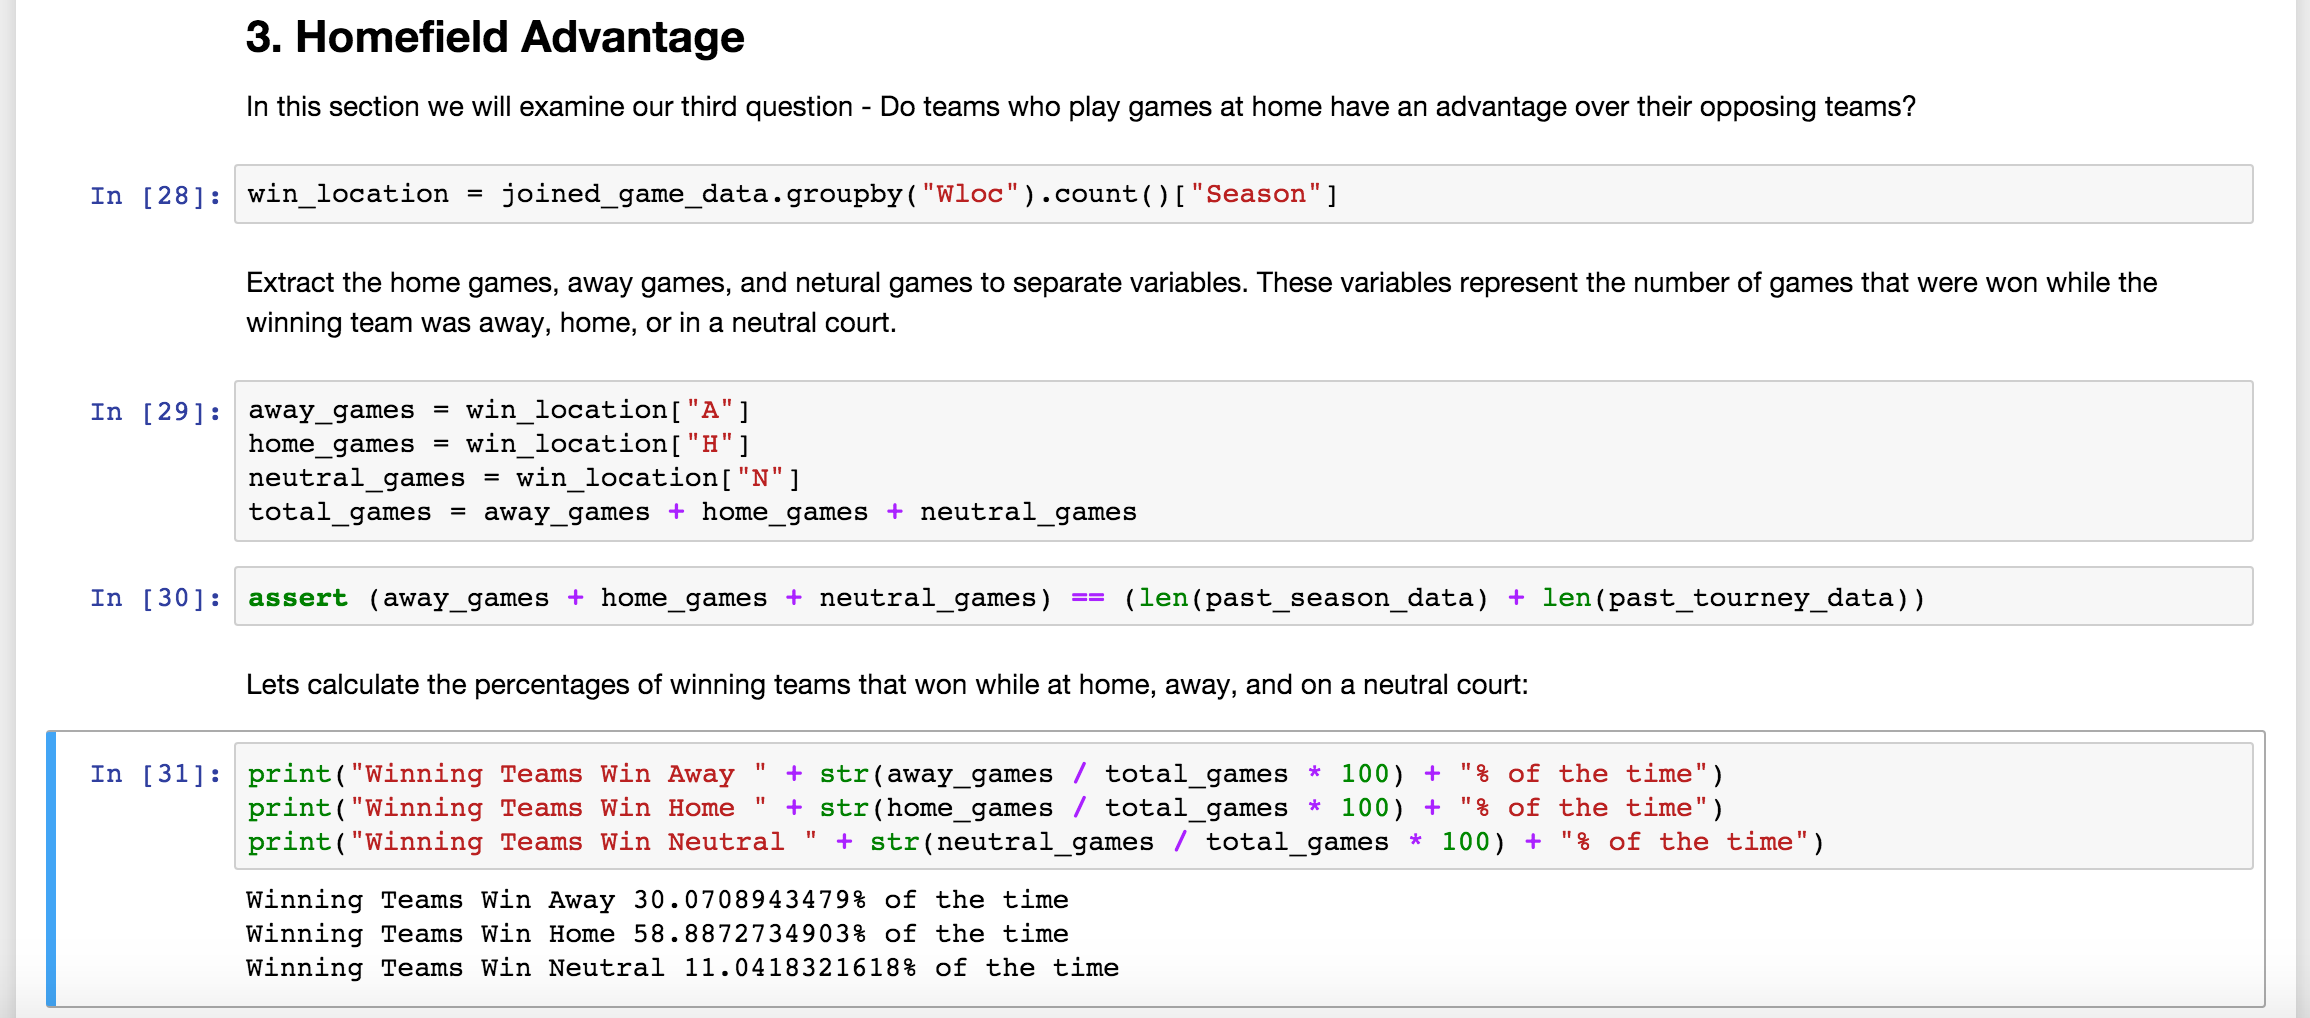

In [7]:
Image("homefield_adv.png")

## Results of Data Analysis
After analyzing the data I concluded to remove columns associated with the least significance using Variance Analysis and the RandomForestClassifier for feature importances.

Features Calculated:
- Win Percentage (# games won / total # games played)
- Average Points Scored per game
- Percentage of Field Goals made
- Percentage of 3-Pointers made
- Average number of Defensive Rebounds per game
- Average number of Assists per game
- Average number of Turnovers per game
- Average number of Personal Fouls per game

Features Removed:
- Win Percentage (# games won / total # games played)
- Average Points Scored per game
- Percentage of Free Throws made
- Average number of Offensive Rebounds per game
- Average number of Steals per game
- Average number of Blocks per game

## Predicting Matchups

Let's grab the stats for each team for the specified season.

In [8]:
team_stats_for_season = nh.calc_year_data(2016, season_data_2016, teams)

In [9]:
team_stats_for_season.head()

,Team_Name,Season,wp,ppg,fgp,ftp,fgp3,or,dr,ast,to,stl,blk,pf
Team_Id,,,,,,,,,,,,,,
1101,Abilene Chr,2016,0.333333,69.851852,0.441621,0.706985,0.363458,5.851852,15.962963,12.888889,13.407407,4.444444,2.444444,22.370370
1102,Air Force,2016,0.400000,67.433333,0.422168,0.673813,0.333922,7.533333,21.633333,13.033333,13.200000,5.433333,1.666667,19.333333
1103,Akron,2016,0.757576,76.333333,0.433637,0.689769,0.389389,16.242424,38.757576,14.515152,10.818182,8.181818,3.848485,17.848485
1104,Alabama,2016,0.562500,66.843750,0.426627,0.639885,0.342896,12.875000,28.218750,10.562500,13.312500,6.875000,5.281250,19.312500
1105,Alabama A&M,2016,0.357143,67.107143,0.413859,0.682119,0.283019,8.178571,17.607143,12.642857,11.750000,4.178571,2.142857,19.357143


### Set Up Classification Model
I decided to use a Logistic Regression as my classifier mostly because it was the most accurate predictor out of all the classifiers I tried.

In [10]:
dataset = pd.read_pickle("machine_learning_dataset")

In [11]:
dataset.head()

,Wfgp,Wfgp3,Wdr,Wast,Wto,Wpf,Lfgp,Lfgp3,Ldr,Last,Lto,Lpf,Win
46253,0.454545,0.312500,26,15,12,16,0.339286,0.066667,22,9,15,23,True
62629,0.420000,0.307692,32,13,19,16,0.338462,0.136364,23,5,12,19,True
21495,0.510638,0.533333,21,19,14,14,0.333333,0.222222,12,11,13,25,True
55532,0.451613,0.333333,25,11,8,23,0.363636,0.250000,29,11,13,15,True
42770,0.480000,0.473684,23,14,9,14,0.500000,0.400000,22,11,11,19,True


In [12]:
from sklearn import linear_model
from sklearn import naive_bayes

In [13]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(dataset[nh.featured_columns], dataset[nh.target_column])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
gaussian_model = naive_bayes.GaussianNB()
gaussian_model.fit(dataset[nh.featured_columns], dataset[nh.target_column])

GaussianNB()

# Predict Matchups Of Big West Conference
Current Big West League Standings **(minus UC Santa Barbara because they have never made it to the Tournament)**:

In [15]:
big_west_teams = ["Hawaii", "UC Irvine", "Long Beach St", "UC Davis", "CS Northridge", "UC Riverside", 
                  "Cal Poly SLO", "CS Fullerton"]
big_west = team_stats_for_season[team_stats_for_season.Team_Name.isin(big_west_teams)].sort_values("wp")

In [16]:
big_west.head(8)

,Team_Name,Season,wp,ppg,fgp,ftp,fgp3,or,dr,ast,to,stl,blk,pf
Team_Id,,,,,,,,,,,,,,
1142,Cal Poly SLO,2016,0.285714,71.964286,0.413341,0.681895,0.354430,6.107143,15.357143,13.857143,10.428571,2.714286,3.214286,20.750000
1168,CS Fullerton,2016,0.285714,69.321429,0.406210,0.692754,0.333333,5.571429,15.392857,9.821429,13.357143,3.000000,1.392857,20.964286
1169,CS Northridge,2016,0.285714,71.142857,0.428748,0.717231,0.301746,6.107143,14.107143,13.892857,14.142857,3.750000,3.214286,20.678571
1413,UC Davis,2016,0.321429,63.000000,0.426862,0.639604,0.359268,5.964286,17.214286,11.250000,14.142857,4.500000,1.500000,18.071429
1415,UC Riverside,2016,0.387097,67.870968,0.421332,0.712000,0.344880,7.451613,17.935484,12.032258,13.419355,4.193548,2.774194,19.870968
1253,Long Beach St,2016,0.562500,72.906250,0.424906,0.684211,0.369014,12.156250,31.031250,15.000000,12.281250,6.687500,2.500000,20.531250
1414,UC Irvine,2016,0.718750,70.718750,0.454597,0.686364,0.368030,14.437500,37.656250,15.250000,12.343750,7.937500,4.937500,18.750000
1218,Hawaii,2016,0.833333,77.133333,0.459268,0.686224,0.327869,16.666667,41.566667,15.633333,13.166667,11.566667,3.900000,20.466667


In [17]:
def predictor_logistic(team1, team2):
    print(nh.predict_game_outcome(team1, team2, team_stats_for_season, logistic_model))

In [18]:
def predictor_gaussian(team1, team2):
    print(nh.predict_game_outcome(team1, team2, team_stats_for_season, gaussian_model))

## Logistic Regression Predictor

In [19]:
interact(predictor_logistic, team1=list(big_west["Team_Name"]), team2=list(big_west["Team_Name"]));

There is a 50.5443923952% chance that Cal Poly SLO will win this game.
There is a 49.4556076048% chance that Cal Poly SLO will win this game.



## Gaussian Predictor

In [20]:
interact(predictor_gaussian, team1=list(big_west["Team_Name"]), team2=list(big_west["Team_Name"]));

There is a 49.0537923949% chance that Cal Poly SLO will win this game.
There is a 50.9462076051% chance that Cal Poly SLO will win this game.

